
# <span style='color:green;font-size:200%'> Gráficos de COVID-19 por paises</span>
***

## <span style='color:blue;font-size:100%'> Paises selecionados:</span>
* USA        
* Brasil   
* Itália 
* India

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from read_covid19 import read

## <span style='color:red;font-size:100%'> Atualiza do dataset</span>

In [22]:
new = True

In [23]:
if new:    
#    read(url = 'https://covid-tracker-us.herokuapp.com')
    read(url="https://cvtapi.nl")

---

In [24]:
dados = pd.read_csv('casos_e_mortes_confirmados.csv')

In [25]:
dados_grupo = dados.groupby('Pais')

In [26]:
dados_grupo.get_group('Brasil').tail(n=10)

,Data,Casos,Casos_por_habitantes,Mortes,Mortes_por_habitantes,Pais,Dias,Casos_Media,Mortes_Media,Taxa_Casos_Media,Taxa_Mortes_Media,Taxa_Casos,Taxa_Mortes,Porcentagem,Porcentagem_Media
779,31/03/2021,12748747,60348.279488,321515,1521.943849,Brasil,379,1.253287e+07,312336.714286,74239.285714,3117.428571,91097.0,3769.0,2.52,2.52
780,01/04/2021,12839844,60779.502040,325284,1539.785027,Brasil,380,1.260711e+07,315454.142857,72238.285714,3013.428571,70238.0,2922.0,2.53,2.53
781,02/04/2021,12910082,61111.985103,328206,1553.616792,Brasil,381,1.267935e+07,318467.571429,66176.428571,2806.142857,43515.0,1987.0,2.54,2.54
782,03/04/2021,12953597,61317.970474,330193,1563.022582,Brasil,382,1.274553e+07,321273.714286,64324.000000,2746.714286,31359.0,1240.0,2.55,2.55
783,04/04/2021,12984956,61466.413431,331433,1568.892325,Brasil,383,1.280985e+07,324020.428571,62855.142857,2698.000000,28645.0,1319.0,2.55,2.55
784,05/04/2021,13013601,61602.009224,332752,1575.136027,Brasil,384,1.287271e+07,326718.428571,63210.142857,2757.285714,86979.0,4195.0,2.56,2.56
785,06/04/2021,13100580,62013.738550,336947,1594.993746,Brasil,385,1.293592e+07,329475.714286,63494.000000,2751.571429,92625.0,3829.0,2.57,2.57
786,07/04/2021,13193205,62452.194140,340776,1613.118943,Brasil,386,1.299941e+07,332227.285714,62859.000000,2820.142857,86652.0,4249.0,2.58,2.58
787,08/04/2021,13279857,62862.375557,345025,1633.232280,Brasil,387,1.306227e+07,335047.428571,66156.000000,2930.285714,93317.0,3693.0,2.60,2.60
788,09/04/2021,13373174,63304.106842,348718,1650.713700,Brasil,388,1.312842e+07,337977.714286,NaN,NaN,NaN,NaN,2.61,2.61


In [27]:
#paises = ['USA', 'Brasil', 'Espanha', 'Alemanha', 'Itália', 'Turquia' ]
#paises = ['USA', 'Brasil', 'Alemanha', 'Itália', 'Russia' ]
#paises_sem = ['Brasil', 'Russia', 'Itália', 'USA']
paises = ['USA', 'Brasil', 'India', 'Itália']
paises_sem = ['Brasil', 'USA', 'India', 'Itália']
# cores
cor = { 'Brasil'   :      'black',
         'USA'     :       'blue',
         'Itália'  :          'm',
         'Espanha' :        'red',
         'Russia'  : 'darkorange',
         'Alemanha':      'green',
         'India'   :      'green'}
# transparencia

alpha ={ 'Brasil'   :     1.0,
         'USA'     :      0.6,
         'Itália'  :      0.6,
         'Espanha' :      0.6,
         'Russia'  :      0.6,
         'Alemanha':      0.6,
         'India'   :      0.6}

#
mar = { 'Brasil'   :     None,
         'USA'     :      'o',
         'Itália'  :      '^',
         'Espanha' :      'x',
         'Russia'  :      's',
         'Alemanha':      'p',
         'India'   :      'p'}

#
lw = { 'Brasil'   :     3,
        'USA'     :     1,
        'Itália'  :     1,
        'Espanha' :     1,
        'Russia'  :     1,
        'Alemanha':     1,
        'India'   :     1}

# divisao do eixo x
#x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

---
## <span style='color:green;font-size:150%'> Plotando o gráfico dos casos por milhões de habitantes</span>
---

<AxesSubplot:title={'center':'Casos Totais Confirmados'}, xlabel='Número de dias apartir do 200° caso', ylabel='Número de Casos por 1 Milhão'>

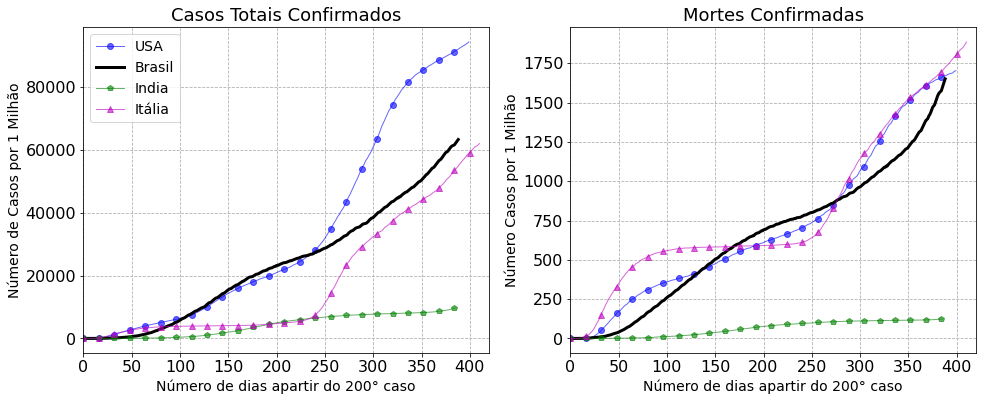

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises):
    ax1.plot(dados_grupo.get_group(name).Dias, 
             dados_grupo['Casos_por_habitantes'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 16)

    ax2.plot(dados_grupo.get_group(name).Dias, 
             dados_grupo['Mortes_por_habitantes'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 16)
# eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 420)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Casos por 1 Milhão', fontsize = 14)
ax1.legend(loc = 'upper left', fontsize = 14)
ax1.set_title('Casos Totais Confirmados', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 420)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax2.set_ylabel('Número Casos por 1 Milhão', fontsize = 14)
ax2.set_title('Mortes Confirmadas', fontsize = 18)
ax2.grid(ls = '--')

ax1

In [29]:
fig.savefig('../fig/casos_mortes_por_habitantes.png', dpi = 300)

----
----
## <span style='color:green;font-size:150%'> Plotando o gráfico em logY dos casos totais confirmados</span>
---

<AxesSubplot:title={'center':'Casos Totais Confirmados'}, xlabel='Número de dias apartir do 200° caso', ylabel='Número de Casos'>

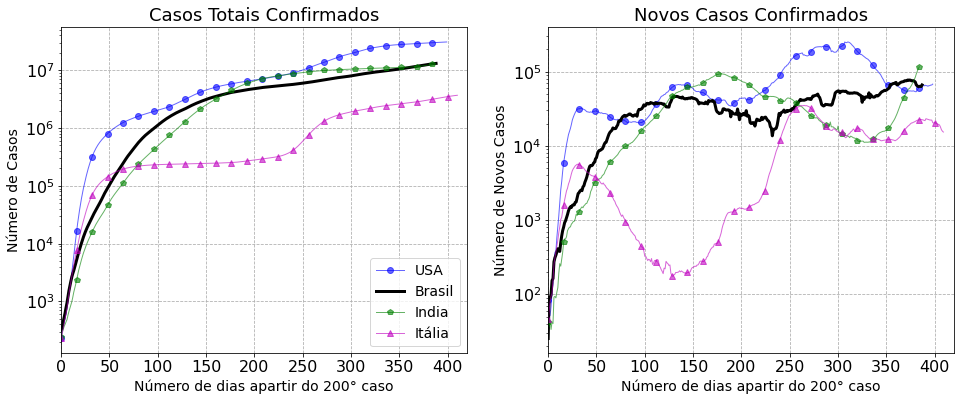

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises):
    ax1.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)

    ax2.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)
# eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 420)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Casos', fontsize = 14)
ax1.legend(loc = 'lower right', fontsize = 14)
ax1.set_title('Casos Totais Confirmados', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 420)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax2.set_ylabel('Número de Novos Casos', fontsize = 14)
ax2.set_title('Novos Casos Confirmados', fontsize = 18)
ax2.grid(ls = '--')

ax1

In [31]:
fig.savefig('../fig/casos.png', dpi = 300)

---
## <span style='color:green;font-size:150%'> Plotando o gráfico dos casos totais confirmados</span>
---

<AxesSubplot:title={'center':'Casos Totais Confirmados'}, xlabel='Número de dias apartir do 200° caso', ylabel='Número de Casos'>

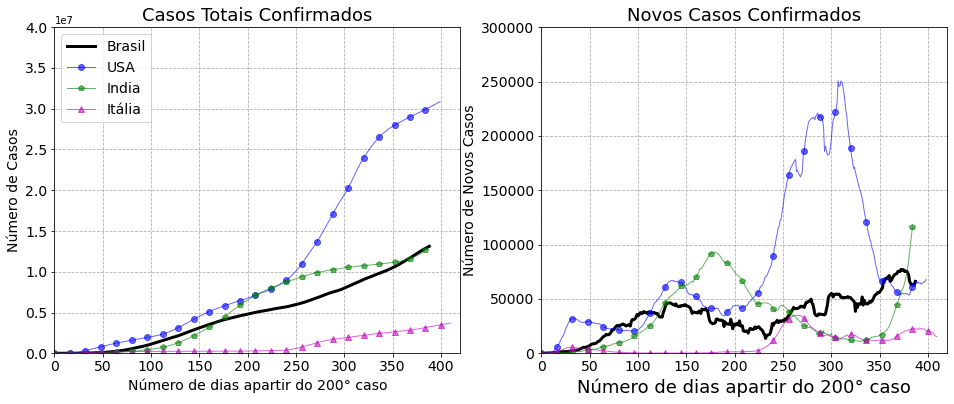

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises_sem):
    ax1.plot(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)

    ax2.plot(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)
# eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(14)

ax1.set_xlim(0, 420)
ax1.set_ylim(0, 40000000)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Casos', fontsize = 14)
ax1.legend(loc = 'upper left', fontsize = 14)
ax1.set_title('Casos Totais Confirmados', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(14)
    
ax2.set_xlim(0, 420)
ax2.set_ylim(0, 300000)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax2.set_ylabel('Número de Novos Casos', fontsize = 14)
ax2.set_title('Novos Casos Confirmados', fontsize = 18)
ax2.grid(ls = '--')

ax1

----
----
## <span style='color:green;font-size:150%'> Plotando o gráfico logY de mortes confirmadas</span>
---

<AxesSubplot:title={'center':'Mortes Totais Confirmadas'}, xlabel='Número de dias apartir do 200° caso', ylabel='Número de Mortes'>

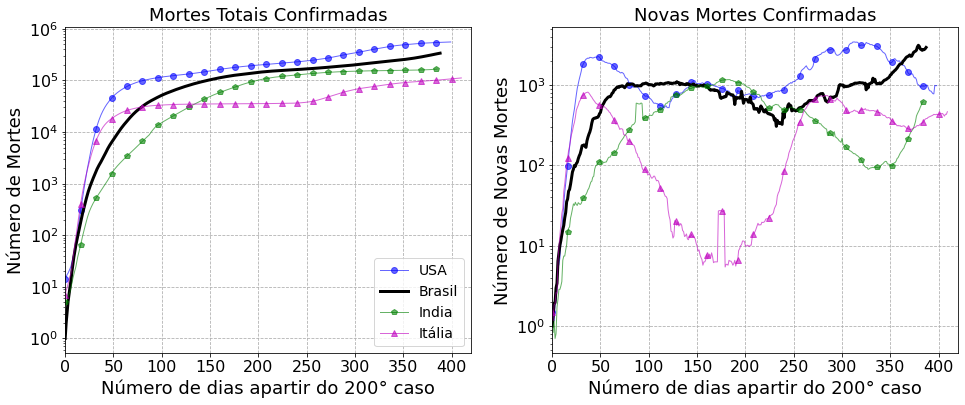

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises):
    ax1.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Mortes_Media'].get_group(name), 
                 label  = name, 
                 ls     = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)
    
    ax2.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Mortes_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 16)
#eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 420)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax1.set_ylabel('Número de Mortes', fontsize = 18)
ax1.legend(loc = 'lower right', fontsize = 14)
ax1.set_title('Mortes Totais Confirmadas', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 420)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax2.set_ylabel('Número de Novas Mortes', fontsize = 18)
ax2.set_title('Novas Mortes Confirmadas', fontsize = 18)
ax2.grid(ls = '--')

ax1

In [34]:
fig.savefig('../fig/mortes.png', dpi = 300)

---
## <span style='color:green;font-size:150%'> Plotando o gráfico dos casos totais confirmados</span>
---

<AxesSubplot:title={'center':'Mortes Totais Confirmadas'}, xlabel='Número de dias apartir do 200° caso', ylabel='Número de Mortes'>

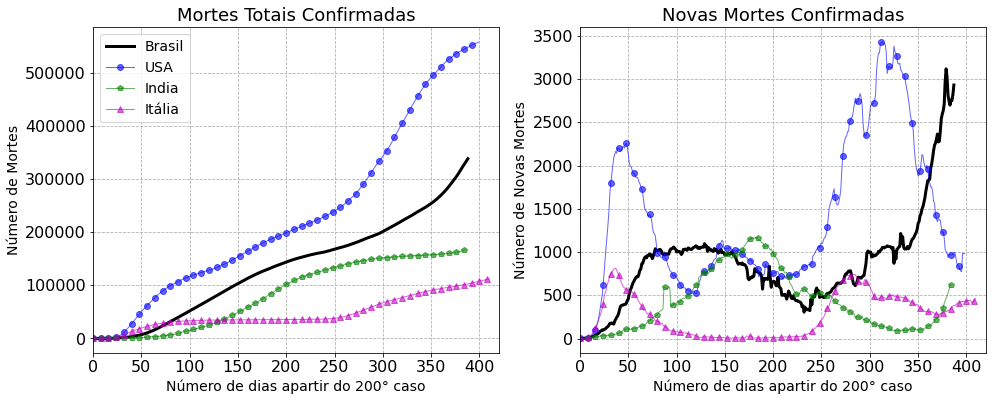

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises_sem):
    ax1.plot(dados_grupo.get_group(name).Dias, 
             dados_grupo['Mortes_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 8)
    
    ax2.plot(dados_grupo.get_group(name).Dias, 
             dados_grupo['Taxa_Mortes_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 8)

#eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 420)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Mortes', fontsize = 14)
ax1.legend(loc = 'upper left', fontsize = 14)
ax1.set_title('Mortes Totais Confirmadas', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 420)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax2.set_ylabel('Número de Novas Mortes', fontsize = 14)
ax2.set_title('Novas Mortes Confirmadas', fontsize = 18)
ax2.grid(ls = '--')

ax1

---
---
##  <span style='color:green;font-size:150%'> Plotando Porcentagem de Mortes </span>
-----

### $n_{casos} \rightarrow $  número total de casos confirmadas
### $n_{mortes}\rightarrow $  número total de mortes confirmadas

### $p = \frac{n_{mortes}}{n_{casos}} \times 100\rightarrow $ Porcentual de mortes


<AxesSubplot:title={'center':'Porcentagem de Mortes'}, xlabel='Número de dias apartir do 200° caso', ylabel='%'>

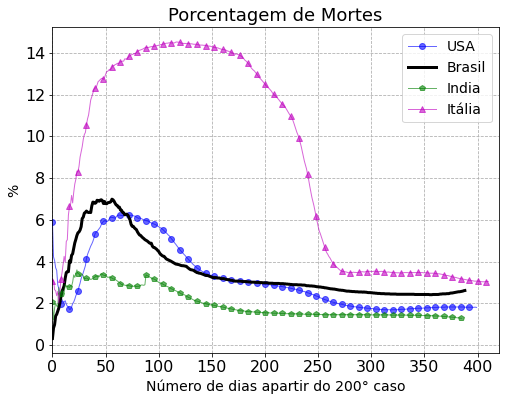

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))

for i, name in enumerate(paises):
    ax.plot(dados_grupo.get_group(name).Dias,
            dados_grupo['Porcentagem_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 8)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

ax.set_xlim(0, 420)
ax.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax.set_ylabel('%', fontsize = 14)
ax.legend(loc = 'upper right', fontsize = 14)
ax.set_title('Porcentagem de Mortes', fontsize = 18)
ax.grid(ls = '--')

ax

In [37]:
fig.savefig('../fig/porcentagem_de_mortos.png', dpi = 300)

---
---